In [16]:
import yfinance as yf # noqa
import pandas as pd
import os # noqa

from alpha import BaseAlpha, EmaCrossover # noqa
from strategies import PipMinerStrategy # noqa
from reporters import AutoReporter  # noqa: F401
from utils import clear_terminal
from backtester import Backtester

In [17]:
start_date = '2021-01-01'
end_date = '2022-12-31'

clear_terminal()

# FOR CRYPTO
tickers = ['BTCUSDT_1D'] # 'DOGEUSDT', 'ETHUSDT', 'GMTUSDT', 'SOLUSDT']

dfs = []   

# Create DataHandler
backtester = Backtester(start_date=start_date, end_date=end_date, max_exposure=1)

# backtester.add_alpha(PipMinerStrategy, name='pip_miner', n_pivots=5, lookback=24, hold_period=6, n_clusters=85, train_split_percent=.6)
# backtester.add_alpha(BaseAlpha, name='base_alpha', profit_perc=.1, loss_perc=.05)
backtester.add_alpha(EmaCrossover, source='close', fast_length=5, slow_length=10, profit_perc=.1, loss_perc=.05)

for ticker in tickers:
    try:
        file_name = f'/Users/jerryinyang/Code/quantbt/data/prices/{ticker}.parquet'
        df = pd.read_parquet(file_name)
    except Exception:
        file_name = f'/Users/jerryinyang/Code/quantbt/data/prices/{ticker}.csv'
        df = pd.read_csv(file_name)
    
    backtester.add_data(ticker=ticker, dataframe=df) #, date_column_index=0)


engine = backtester.backtest()

Initiating Backtest
Backtest Complete. Final Equity : 114024.08669752257


In [18]:
 # Use Reporter
reporter = AutoReporter('basic', 'basic')
reporter.compute_report(backtester)

,id,net_profit,average_pnl,max_drawdown,max_drawdown_percent,total_closed_trades,profit_factor,payoff_ratio,win_rate %,average_duration,max_consecutive_wins,max_consecutive_losses,sharpe_ratio,cagr,sortino
0,dcfd436f-28d1-434a-bc1c-10ac567bafdf,14024.086698,212.486162,81272.945187,55.010026,66,1.049464,1.836562,36.363636,0 days 00:00:00.000374400,3,8,0.283416,0.050066,0.438384


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


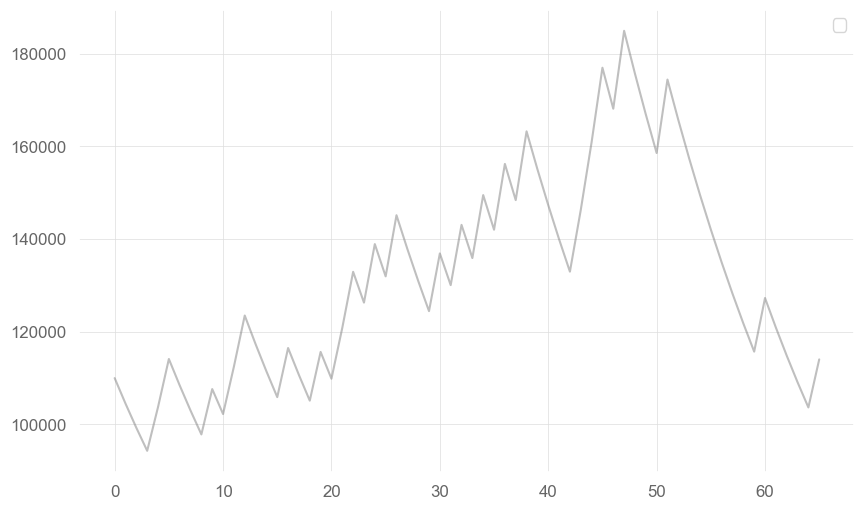

In [19]:
reporter.compute_earnings()
reporter.plot_backtests()
reporter.plot_equity_curves()

In [20]:
reporter.metrics.to_csv('ttt.csv')